<a href="https://colab.research.google.com/github/trypuz/ai_dla_kazdego/blob/main/siec_neuronowa_dla_kazdego/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonowy neuron

In [28]:
example_input = [[2],
                 [3],
                 [4],
                 [5],
                 [6]]

In [30]:
example_weights = [[0.1],
                   [0.3],
                   [0.5],
                   [0.2],
                   [0.4]]

In [31]:
import numpy as np
input_vector = np.array(example_input)
weights_vector = np.array(example_weights)

In [32]:
input_vector

array([[2],
       [3],
       [4],
       [5],
       [6]])

In [33]:
input_vector.shape

(5, 1)

In [34]:
n_X = input_vector.shape[0]  # liczba cech w przykładzie treningowym
m = input_vector.shape[1]  # liczba przykładów treningowych
print('n_X =', n_X)
print('m =', m)

n_X = 5
m = 1


In [35]:
dot = 0
for x, w in zip(example_input, example_weights):
  dot = dot + (x[0] * w[0])
print('dot =', dot)

dot = 6.5


In [36]:
dot = np.dot(input_vector.T, weights_vector)
print('dot =', dot)

dot = [[6.5]]


In [37]:
bias = 0

In [38]:
activation_level = dot + bias

In [39]:
threshold = 0.5

In [40]:
output = 0
if activation_level > threshold:
  output = 1
else:
  output = 0

In [41]:
output

1

## Uczymy pythonowy neuron

In [42]:
expected_output = 0

In [43]:
error = input_vector * (output - expected_output)

# jeśli expected_output = output, to error == 0
# jeśli expected_output == 1 i output == 0, to error == - input_vector
# jeśli expected_output == 0 i output == 1, to error == input_vector

In [48]:
error

array([[-2],
       [-3],
       [-4],
       [-5],
       [-6]])

In [52]:
new_weights = weights_vector - error

# gdy output będzie większy od oczekiwanego, to będziemy zmniejszać wagi
# gdy output będzie mniejszy od oczekiwanego, to będziemy zwiększać wagi

In [53]:
new_weights

array([[-1.9],
       [-2.7],
       [-3.5],
       [-4.8],
       [-5.6]])

In [55]:
dot = np.dot(input_vector.T, new_weights)
activation_level = dot + bias
if activation_level > threshold:
  output = 1
else:
  output = 0
print('output =', output)

output = 0


# Sieć jednowarstwowa

# Koniunkcja

In [56]:
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]
Y = [[1, 0, 0, 0]] 

# Czytamy kolumnami.

In [58]:
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [59]:
X.shape

(2, 4)

In [60]:
n_X = X.shape[0]  # liczba cech w przykładzie treningowym
m = X.shape[1]  # liczba przykładów treningowych
print('n_X =', n_X)
print('m =', m)

n_X = 2
m = 4


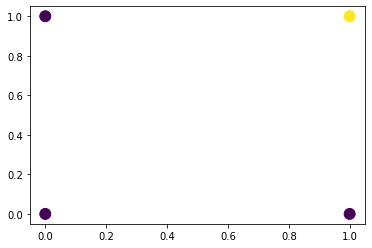

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X[0, :], X[1, :], marker='o', c = Y.T, s=120);

In [69]:
# biblioteka do generowania liczb losowych
from random import random

In [68]:
np.random.seed(42)
np.random.rand(n_X,1) 

array([[0.37454012],
       [0.95071431]])

In [73]:
np.random.seed(42)
np.random.rand(n_X,1) * 0.001

array([[0.00037454],
       [0.00095071]])

In [74]:
np.random.seed(42)
np.random.rand()

0.3745401188473625

In [77]:
def initialize_parameters(n_X):
  np.random.seed(42)
  weights = np.random.rand(n_X,1) * 0.001
  bias = np.random.rand() * 0.001

  assert(weights.shape == (n_X,1))
  
  return weights, bias

In [82]:
weights, bias = initialize_parameters(n_X)

In [83]:
weights

array([[0.00037454],
       [0.00095071]])

In [84]:
weights.T

array([[0.00037454, 0.00095071]])

In [85]:
bias

0.0007319939418114051

In [86]:
def preactivation(weights, bias, X):
  Z = np.dot(weights.T, X) + bias
  
  assert(Z.shape == (weights.T.shape[0], X.shape[1])) # (1, m)

  return Z

In [87]:
# przykład mnożenia np.dot
import numpy as np
x = [[1,2]]
y = [[3,4,5],
     [6,7,8]]
x = np.array(x)
y = np.array(y)
print('x.shape =', x.shape)
print('y.shape =' , y.shape)
z = np.dot(x,y)
print(z)
print(z[0,1])

x.shape = (1, 2)
y.shape = (2, 3)
[[15 18 21]]
18


In [88]:
Z = preactivation(weights, bias, X)

In [89]:
Z

array([[0.00205725, 0.00110653, 0.00168271, 0.00073199]])

In [90]:
Z.shape

(1, 4)

In [98]:
def predict(Z, threshold = 0.5):
  Y_prediction = (Z > threshold) * 1

  assert(Y_prediction.shape == Z.shape)
  return Y_prediction

In [99]:
predict(Z)

array([[0, 0, 0, 0]])

In [114]:
def accuracy(Z, Y):
  correct_answers = (np.sum(predict(Z) == Y) / Y.shape[1])
  return correct_answers

In [115]:
accuracy(Z, Y)

0.75

In [121]:
# czy dodać */dot X
# def error_function(Z, Y):
#   return Y - predict(Z)

def error_function(Z, Y):
  return Z - Y

In [122]:
error_function(Z,Y)

array([[-9.97942752e-01,  1.10653406e-03,  1.68270825e-03,
         7.31993942e-04]])

In [126]:
def update(weights, bias, X, Y):
  Z = preactivation(weights, bias, X)
  error = error_function(Z, Y)

  print(f'dokładność = {accuracy(Z, Y)*100}%')
  
  weights = weights - (np.dot(X, error.T) / m)
  bias = bias - (np.sum(error) / m)

  return weights, bias

In [127]:
update(weights, bias, X, Y)

dokładność = 75.0%


(array([[0.24958359],
        [0.25001573]]), 0.24933737278737134)

In [130]:
def perceptron_model(X, Y, iteration_number):
  n_X = X.shape[0]
  weights, bias = initialize_parameters(n_X)
  for i in range(iteration_number):
    print(f'epoche {i+1}')
    weights, bias = update(weights, bias, X, Y)
  Z = preactivation(weights, bias, X)
  Y_prediction = predict(Z)

  d = {'w':weights,
       'b':bias,
       'Y_pred':Y_prediction}

  return d

In [131]:
d = perceptron_model(X, Y, iteration_number=10)

epoche 1
dokładność = 75.0%
epoche 2
dokładność = 100.0%
epoche 3
dokładność = 75.0%
epoche 4
dokładność = 100.0%
epoche 5
dokładność = 100.0%
epoche 6
dokładność = 100.0%
epoche 7
dokładność = 100.0%
epoche 8
dokładność = 100.0%
epoche 9
dokładność = 100.0%
epoche 10
dokładność = 100.0%


In [132]:
d["w"]

array([[0.43033456],
       [0.430367  ]])

In [133]:
d["b"]

-0.1692249624698694

In [134]:
d["Y_pred"]

array([[1, 0, 0, 0]])

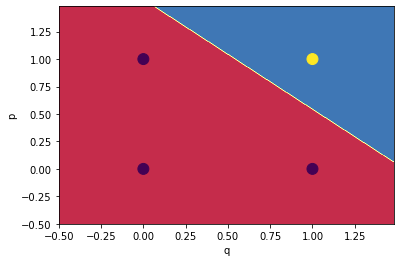

In [145]:
def plot_decision_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
    y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
    h = 0.02

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('p')
    plt.xlabel('q')
    plt.scatter(X[0, :], X[1, :], marker='o', c = Y.T, s=120)


plot_decision_boundary(lambda x: predict(preactivation(d["w"], d["b"], x.T)), X, Y)

# Alternatywa


epoche 1
dokładność = 25.0%
epoche 2
dokładność = 75.0%
epoche 3
dokładność = 100.0%
epoche 4
dokładność = 100.0%
epoche 5
dokładność = 100.0%
epoche 6
dokładność = 100.0%
epoche 7
dokładność = 100.0%
epoche 8
dokładność = 100.0%
epoche 9
dokładność = 100.0%
epoche 10
dokładność = 100.0%


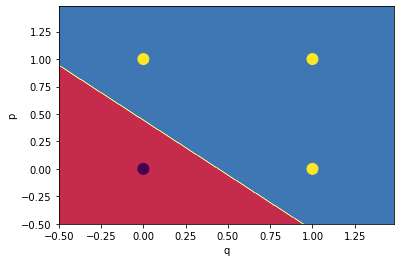

In [146]:
X = [[1, 1, 0, 0],
     [1, 0, 1, 0]]
Y = [[1, 1, 1, 0]] 

X = np.array(X)
Y = np.array(Y)

d = perceptron_model(X, Y, iteration_number=10)
plot_decision_boundary(lambda x: predict(preactivation(d["w"], d["b"], x.T)), X, Y)